In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from numpy.linalg import norm

In [2]:
df = pd.read_csv('ANLSYS2/STROMAL/PRFDR_ordr_T.csv',index_col = 0)

In [3]:
df.head()

,time,iter,type,v_x,v_y,v_z,x,y,z,n_cells
0,0,0,PW,-50.687532,191.245192,-117.648903,[-106.29078014 -345.73049645 97.84397163],[-107.81944444 -343.32638889 96.36805556],[-107.97222222 -345.97916667 92.79166667],1331
1,1,0,PW,-50.277561,-26.930441,-207.181960,[ -60.20833333 -333.72222222 43.76388889],[ -60.22222222 -332.43055556 41.97222222],[ -60.76223776 -328.61538462 43.51048951],1331
2,2,0,PW,8.686991,-89.097131,-180.450207,[ -70.96503497 -356.41958042 128.65034965],[ -71.21830986 -360.37323944 128.53521127],[ -73.43356643 -361.95804196 127.04195804],1331
3,3,0,PW,150.699498,-50.760304,-169.141962,[ -92.36879433 -320.80851064 17.74468085],[ -88.69178082 -320.43150685 18.10958904],[ -90.35211268 -319.11267606 20.20422535],1331
4,4,0,PW,243.258863,76.363223,-183.944981,[-126.76760563 -280.92957746 136.38732394],[-127.26388889 -280.875 140.00694444],[-129.48979592 -283.46938776 141.46258503],1331


In [4]:
df['order'] = df[['v_x','v_y','v_z']].apply(lambda x:norm(np.array([x[0],x[1],x[2]])),axis = 1)
#df['order'] = df[['x','y','z']].apply(lambda x,y,z:norm(x,y,z))
df['order'] = df.order/df.n_cells

In [5]:
df.head()

,time,iter,type,v_x,v_y,v_z,x,y,z,n_cells,order
0,0,0,PW,-50.687532,191.245192,-117.648903,[-106.29078014 -345.73049645 97.84397163],[-107.81944444 -343.32638889 96.36805556],[-107.97222222 -345.97916667 92.79166667],1331,0.172942
1,1,0,PW,-50.277561,-26.930441,-207.181960,[ -60.20833333 -333.72222222 43.76388889],[ -60.22222222 -332.43055556 41.97222222],[ -60.76223776 -328.61538462 43.51048951],1331,0.161450
2,2,0,PW,8.686991,-89.097131,-180.450207,[ -70.96503497 -356.41958042 128.65034965],[ -71.21830986 -360.37323944 128.53521127],[ -73.43356643 -361.95804196 127.04195804],1331,0.151341
3,3,0,PW,150.699498,-50.760304,-169.141962,[ -92.36879433 -320.80851064 17.74468085],[ -88.69178082 -320.43150685 18.10958904],[ -90.35211268 -319.11267606 20.20422535],1331,0.174421
4,4,0,PW,243.258863,76.363223,-183.944981,[-126.76760563 -280.92957746 136.38732394],[-127.26388889 -280.875 140.00694444],[-129.48979592 -283.46938776 141.46258503],1331,0.236207


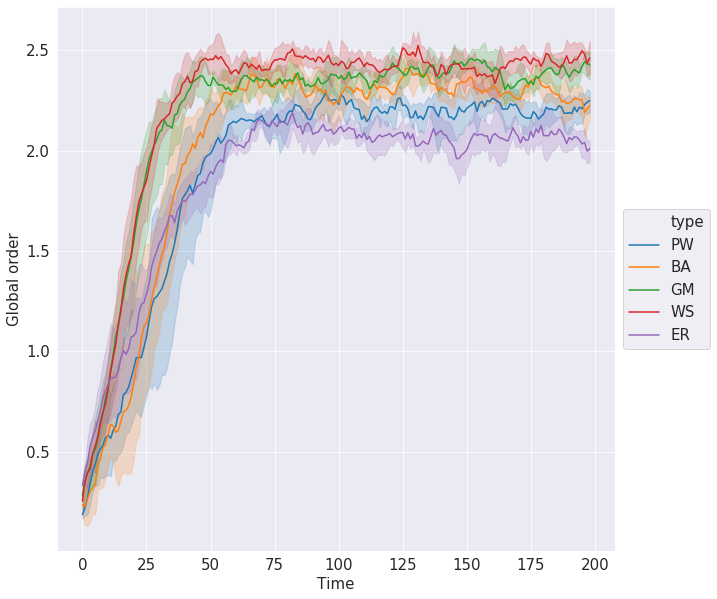

In [6]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'order',data = df,hue = 'type')
plt.ylabel('Global order',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
graph_types = df.type.unique()
std_rows = []
for t in range(197):
    df_at_t = df[df.time == t]
    for gt in graph_types:
        angles = df_at_t[df_at_t.type == gt].order
        std_rows.append([t,gt,np.std(angles)])

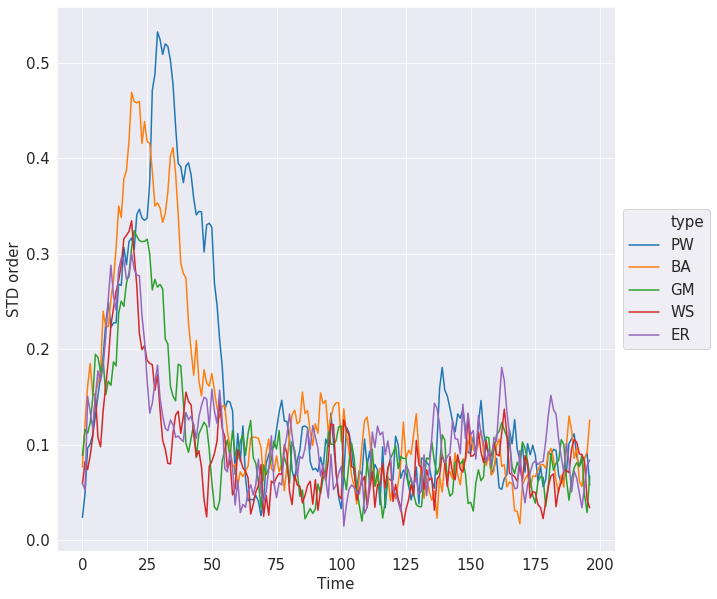

In [8]:
std_df = pd.DataFrame(data = std_rows,columns = ['time','type','std'])
plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'std',data = std_df,hue = 'type')
plt.ylabel('STD order',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))

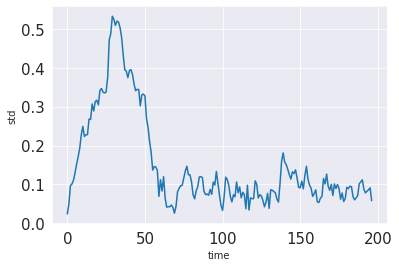

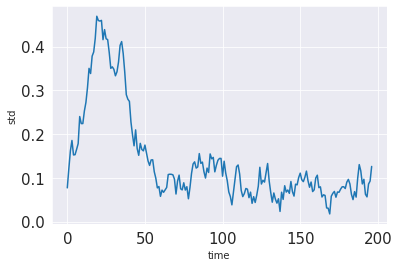

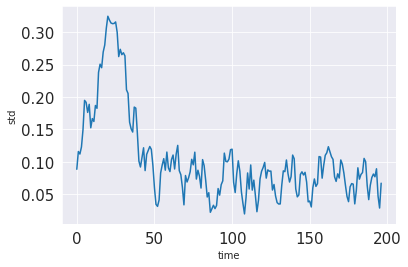

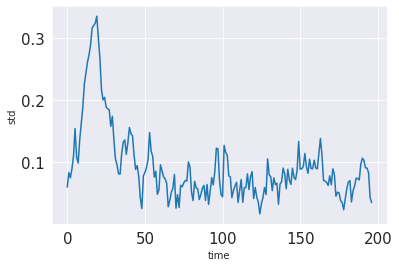

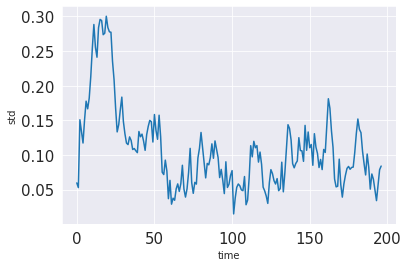

In [9]:
for gt in std_df.type.unique():
    sns.lineplot(x = 'time', y = 'std',data = std_df[std_df.type == gt])
    plt.show()

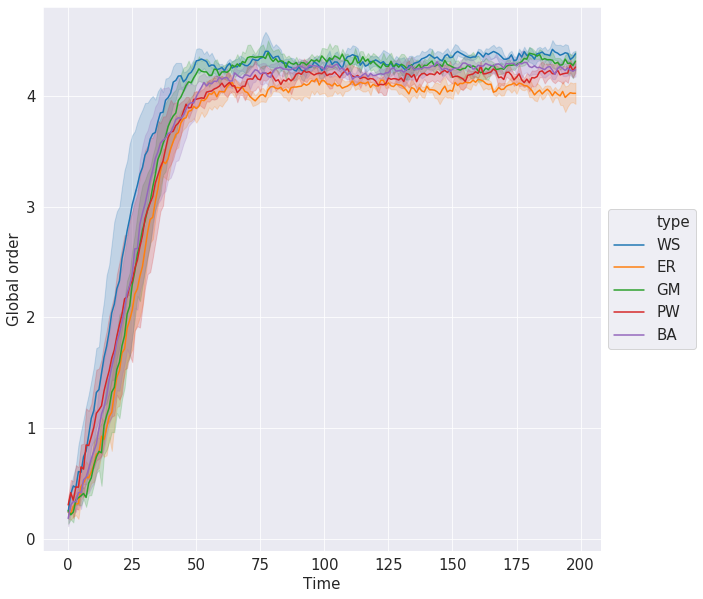

In [10]:
df = pd.read_csv('ANLSYS2/STROMAL/ACT_ordr_T.csv',index_col = 0)

df['order'] = df[['v_x','v_y','v_z']].apply(lambda x:norm(np.array([x[0],x[1],x[2]])),axis = 1)
df['order'] = df.order/df.n_cells

plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'order',data = df,hue = 'type')
plt.ylabel('Global order',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))

In [11]:
graph_types = df.type.unique()
std_rows = []
for t in range(197):
    df_at_t = df[df.time == t]
    for gt in graph_types:
        angles = df_at_t[df_at_t.type == gt].order
        std_rows.append([t,gt,np.std(angles)])

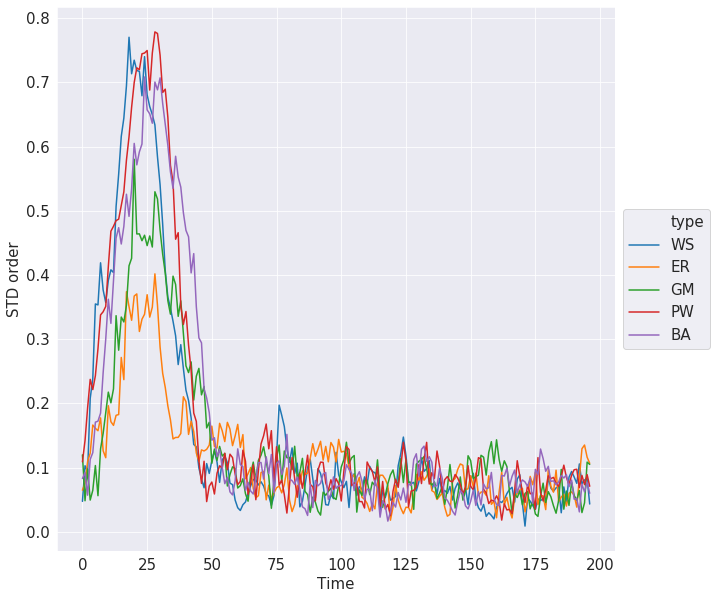

In [12]:
std_df = pd.DataFrame(data = std_rows,columns = ['time','type','std'])
plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'std',data = std_df,hue = 'type')
plt.ylabel('STD order',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))